In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import copy

In [8]:
df = pd.DataFrame({
        'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
        'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]    
        })

In [13]:
k=3
centroids={}
for i in range(k):
    centroids[i+1] = [np.random.randint(0,80),np.random.randint(0,80)]

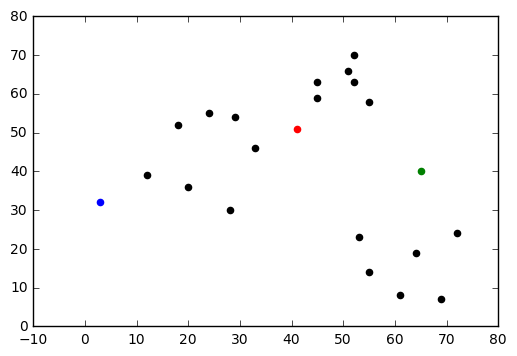

In [14]:
colmap ={1:'r',2:'b',3:'g'}

plt.scatter(df['x'],df['y'],color='k')                 #plotting dataframe points

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])         #ploting randomly chosen centroids in RGB

In [15]:
#it will add a few columns in the data frame
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=np.sqrt(
         (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2
           )  
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)#returns names of columns(axis=1) with min value
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))#strips to get number from name
    df['color'] = df['closest'].map(lambda x: colmap[x])#assigns it appropriate colour (color of closest k)
    return df
#to update the centroids with their means
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return k

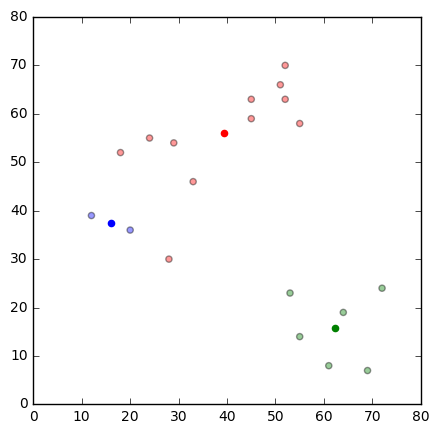

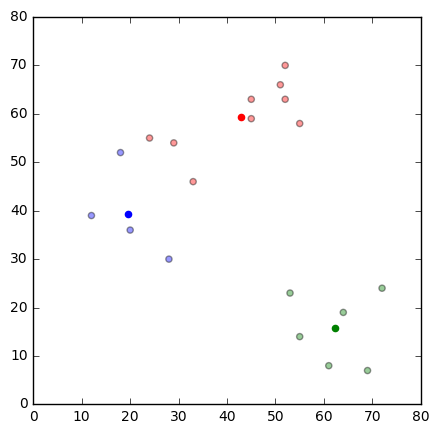

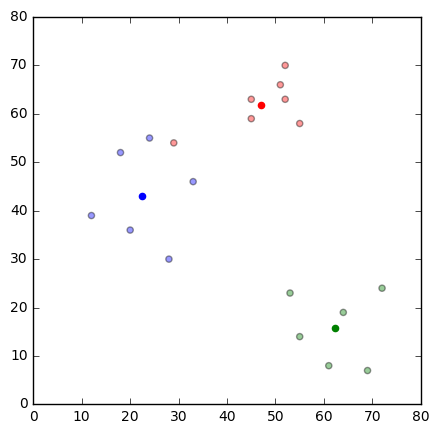

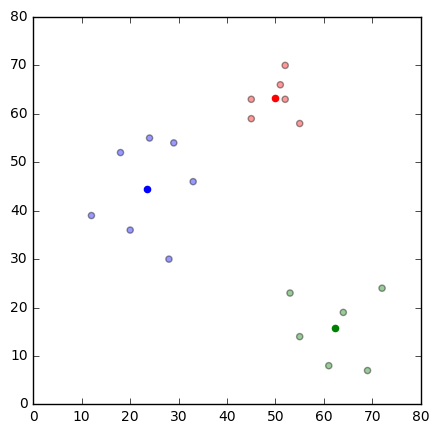

In [16]:
df = assignment(df,centroids)

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.4, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break